<a href="https://colab.research.google.com/github/dilbarhussainmalik12345/AI-ML-DL-Computer-Vision/blob/main/docs/other/carvekit_try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

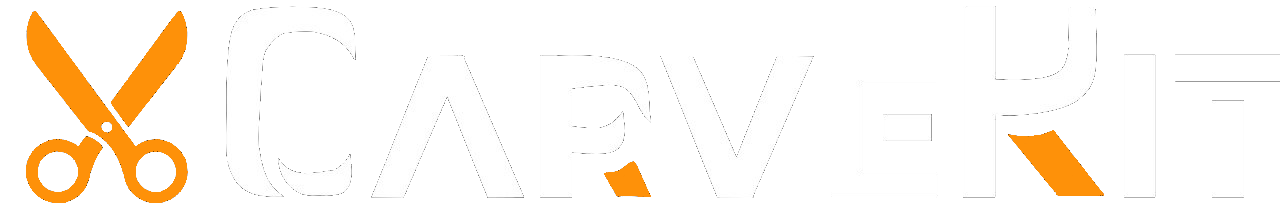

### Automated high-quality background removal framework for an image using neural networks



- 🏢 [Project at GitHub](https://github.com/OPHoperHPO/image-background-remove-tool) 🏢
- 🔗 [Author at GitHub](https://github.com/OPHoperHPO) 🔗

> Please rate our repository with ⭐ if you like our work! Thanks! 😀

This notebook supports **Google Colab GPU runtime**.

> **Enabling and testing the GPU** \
> Navigate to `Edit → Notebook Settings`. \
> Select `GPU` from the `Hardware Accelerator` drop-down.

# Install CarveKit

In [1]:
#@title Install colab-ready python package (Click the arrow on the left)
%cd /content
!pip install carvekit_colab


/content
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 73.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 64.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
#@title Download all models
from carvekit.ml.files.models_loc import download_all

download_all();

/usr/local/lib/python3.11/dist-packages/carvekit/utils/download_models.py:106: UserWarning: Failed to download model from Carve CDN downloader. Trying to download from Huggingface.co downloader.
  warnings.warn(


# Remove background using CarveKit

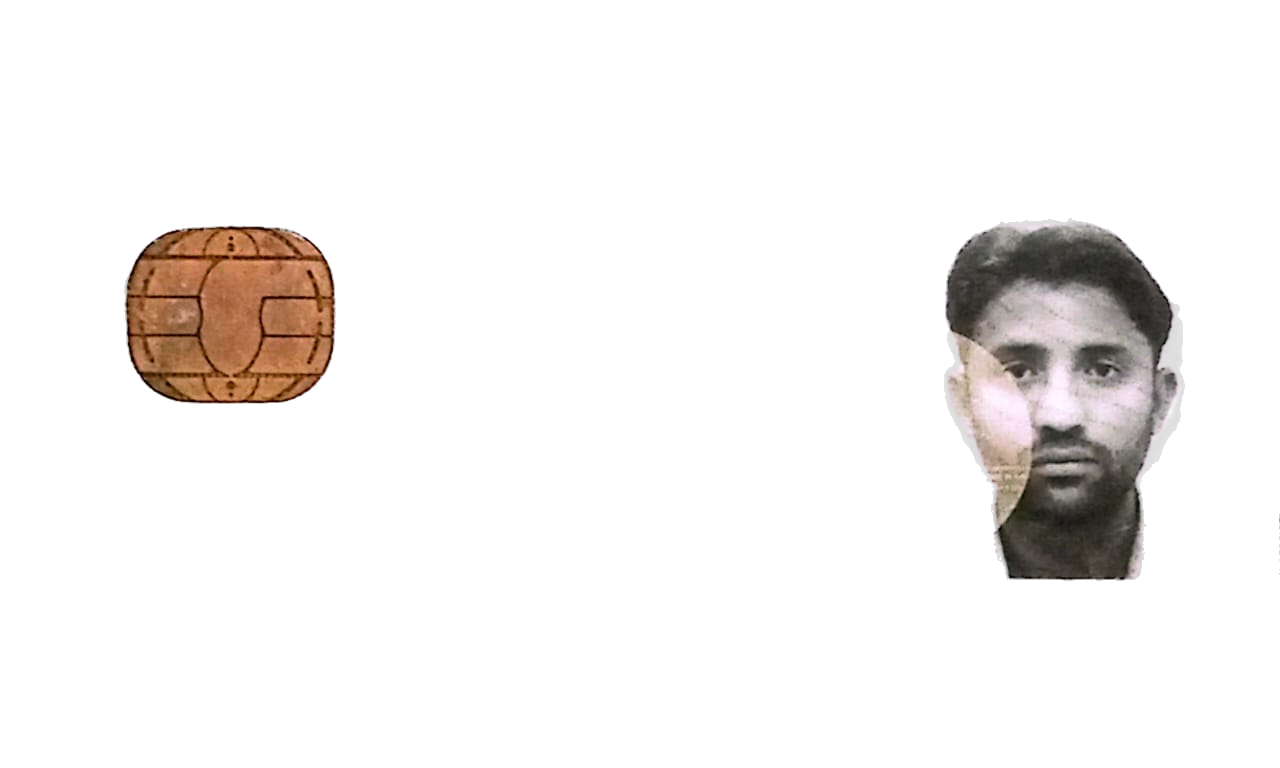

In [4]:
#@title Upload images from your computer
#@markdown Description of parameters
#@markdown - `SHOW_FULLSIZE`  - Shows image in full size (may take a long time to load)
#@markdown - `PREPROCESSING_METHOD`  - Preprocessing method
#@markdown - `SEGMENTATION_NETWORK`  - Segmentation network. Use `u2net` for hairs-like objects and `tracer_b7` for objects
#@markdown - `POSTPROCESSING_METHOD`  - Postprocessing method
#@markdown - `SEGMENTATION_MASK_SIZE` - Segmentation mask size. Use 640 for Tracer B7 and 320 for U2Net
#@markdown - `TRIMAP_DILATION`  - The size of the offset radius from the object mask in pixels when forming an unknown area
#@markdown - `TRIMAP_EROSION`  - The number of iterations of erosion that the object's mask will be subjected to before forming an unknown area
#@markdown > Look README.md and code for more details on networks and methods


import torch
from IPython import display
from google.colab import files
from carvekit.web.schemas.config import MLConfig
from carvekit.web.utils.init_utils import init_interface

SHOW_FULLSIZE = True #@param {type:"boolean"}
PREPROCESSING_METHOD = "none" #@param ["stub", "none"]
SEGMENTATION_NETWORK = "tracer_b7" #@param ["u2net", "deeplabv3", "basnet", "tracer_b7"]
POSTPROCESSING_METHOD = "fba" #@param ["fba", "none"]
SEGMENTATION_MASK_SIZE = 640 #@param ["640", "320"] {type:"raw", allow-input: true}
TRIMAP_DILATION = 30 #@param {type:"integer"}
TRIMAP_EROSION = 5 #@param {type:"integer"}
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'


config = MLConfig(segmentation_network=SEGMENTATION_NETWORK,
                  preprocessing_method=PREPROCESSING_METHOD,
                  postprocessing_method=POSTPROCESSING_METHOD,
                  seg_mask_size=SEGMENTATION_MASK_SIZE,
                  trimap_dilation=TRIMAP_DILATION,
                  trimap_erosion=TRIMAP_EROSION,
                  device=DEVICE)


interface = init_interface(config)




uploaded = files.upload().keys()
display.clear_output()
images = interface(uploaded)
for im in enumerate(images):
  if not SHOW_FULLSIZE:
    im[1].thumbnail((768, 768), resample=3)
  display.display(im[1])

